## Import dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Database conection

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [ ]:
engine = create_engine("sqlite:///<file_name>.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
<new_table_name> = Base.classes.<table_name>


In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [ ]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(<new_table_name>)
print(results)

## Load the file 

In [ ]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results)
df

In [4]:
file_path = 'train.csv'
df = pd.read_csv(file_path)
df 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Perform Basic Data Cleaning

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Preprocesing target variable 'SalePrice'

In [7]:
df['SalePrice'].values

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [8]:
values = df['SalePrice'].values
values

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [9]:
df_values = pd.DataFrame(values)
df_values

,0
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [10]:
df_values.dtypes

0    int64
dtype: object

In [11]:
# to numeric

df['SalePrice'] = pd.to_numeric(df['SalePrice'])
df['SalePrice'].dtypes

dtype('int64')

In [12]:
df_values.describe()

,0
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<AxesSubplot:ylabel='Density'>

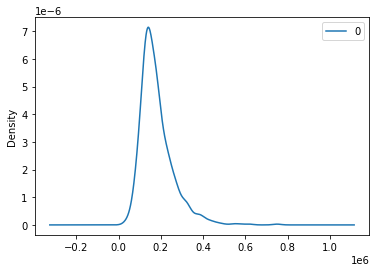

In [13]:
df_values.plot.density()

In [14]:
def change_string(price):
    if price > 180921.2 :
        return "high_price"
    else:
        return "meddium_price"
    
df['SalePrice'] = df['SalePrice'].apply(change_string)
df['SalePrice'].head()

0       high_price
1       high_price
2       high_price
3    meddium_price
4       high_price
Name: SalePrice, dtype: object

In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,high_price
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,high_price
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,high_price
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,meddium_price
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,high_price


# Split the Data into Training and Testing

In [16]:

#df2 = df.filter(['Courses','Fee'], axis=1)

X0 = df.filter(['SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType'], axis=1)

In [17]:
X0 = X0.dropna(subset=['SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType'])

In [19]:
# Create our features
#X = # YOUR CODE HERE



X = pd.get_dummies(X0, columns=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType']).drop('SalePrice', axis=1)

# Create our target
#y = # YOUR CODE HERE

y = X0['SalePrice']


In [20]:
y

1          high_price
2          high_price
3       meddium_price
4          high_price
6          high_price
            ...      
1447       high_price
1451       high_price
1455    meddium_price
1456       high_price
1457       high_price
Name: SalePrice, Length: 591, dtype: object

In [21]:
X.dtypes

MSSubClass_20         uint8
MSSubClass_30         uint8
MSSubClass_40         uint8
MSSubClass_45         uint8
MSSubClass_50         uint8
                      ...  
GarageType_Attchd     uint8
GarageType_Basment    uint8
GarageType_BuiltIn    uint8
GarageType_CarPort    uint8
GarageType_Detchd     uint8
Length: 811, dtype: object

In [22]:
# Check the balance of our target values
y.value_counts()

high_price       340
meddium_price    251
Name: SalePrice, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

### Balanced Random Forest Classifier

In [24]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier

bal_rfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)


In [25]:
bal_rfc.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [26]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

y_pred = bal_rfc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.8362278244631185

In [27]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=["Actualy high_price", "Actualy meddium_price"], 
                     columns=["Predicted high_price", "Predicted meddium_price"])
cm_df

,Predicted high_price,Predicted meddium_price
Actualy high_price,72,13
Actualy meddium_price,11,52


In [28]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                     pre       rec       spe        f1       geo       iba       sup

   high_price       0.87      0.85      0.83      0.86      0.84      0.70        85
meddium_price       0.80      0.83      0.85      0.81      0.84      0.70        63

  avg / total       0.84      0.84      0.83      0.84      0.84      0.70       148



In [29]:
# List the features sorted in descending order by feature importance
features_rank = sorted(zip(bal_rfc.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

KitchenQual_TA: (0.07040925946569035)
FullBath_1: (0.03941899453869701)
HeatingQC_Ex: (0.0286989952977299)
OverallCond_5: (0.028006760780362572)
Foundation_PConc: (0.02584233058049064)
Foundation_CBlock: (0.02419167427955709)
OverallQual_8: (0.022342566448612967)
KitchenQual_Gd: (0.0221228192720416)
OverallQual_5: (0.02127595356099686)
FullBath_2: (0.019599067602263712)
OverallQual_6: (0.01937849403817836)
Exterior2nd_VinylSd: (0.014944197422894918)
Exterior1st_VinylSd: (0.01393478414479909)
OverallQual_7: (0.013745686352198088)
MasVnrType_None: (0.013378894893686055)
HeatingQC_TA: (0.013228862792810684)
MSSubClass_60: (0.013175710363208984)
TotRmsAbvGrd_6: (0.01268135010611781)
KitchenQual_Ex: (0.012045515653490648)
BsmtFullBath_1: (0.011554255287151607)
Neighborhood_NAmes: (0.010702427125825961)
Neighborhood_NridgHt: (0.010281739992335788)
GarageType_Detchd: (0.010151917047810509)
BsmtFullBath_0: (0.009878128305776225)
MasVnrType_Stone: (0.00970154409204844)
LotShape_IR1: (0.00884973